In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
from sklearn.metrics import mean_squared_error

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp_uhna1rc/pubring.gpg' created
gpg: /tmp/tmp_uhna1rc/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [60]:
train = pd.read_csv('drive/Machine_learning/AV/Enigma_ML/train.csv')
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [0]:
train['tag'] = np.sort(train['Tag'])
train['upvote'] = np.sort(train['Upvotes'])

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


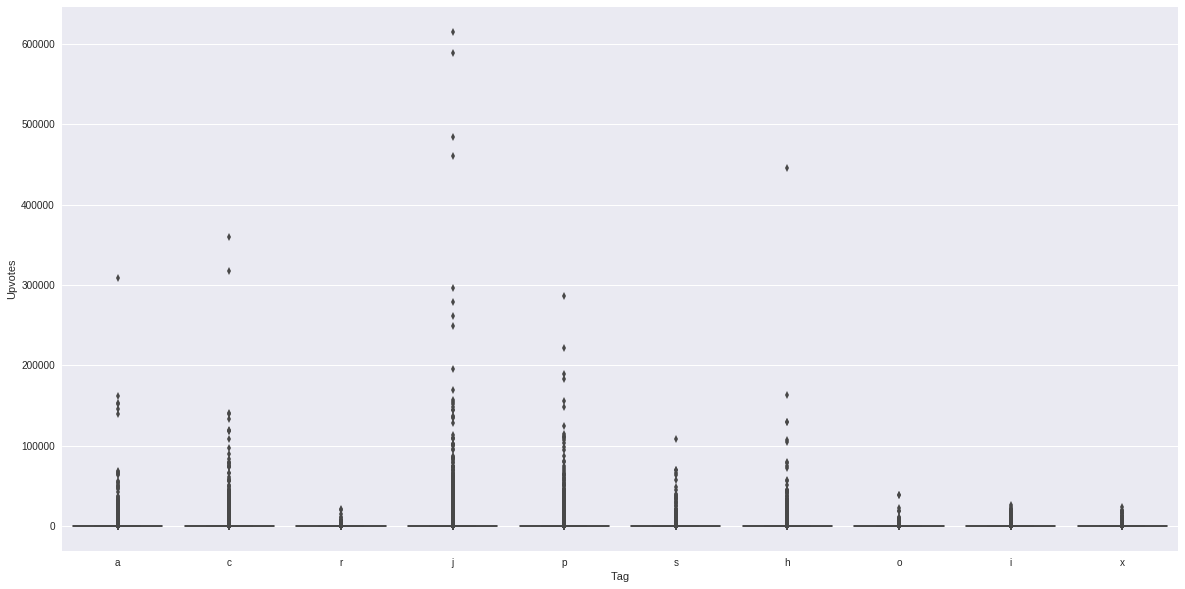

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Tag", y="Upvotes", data=train)
plt.show()

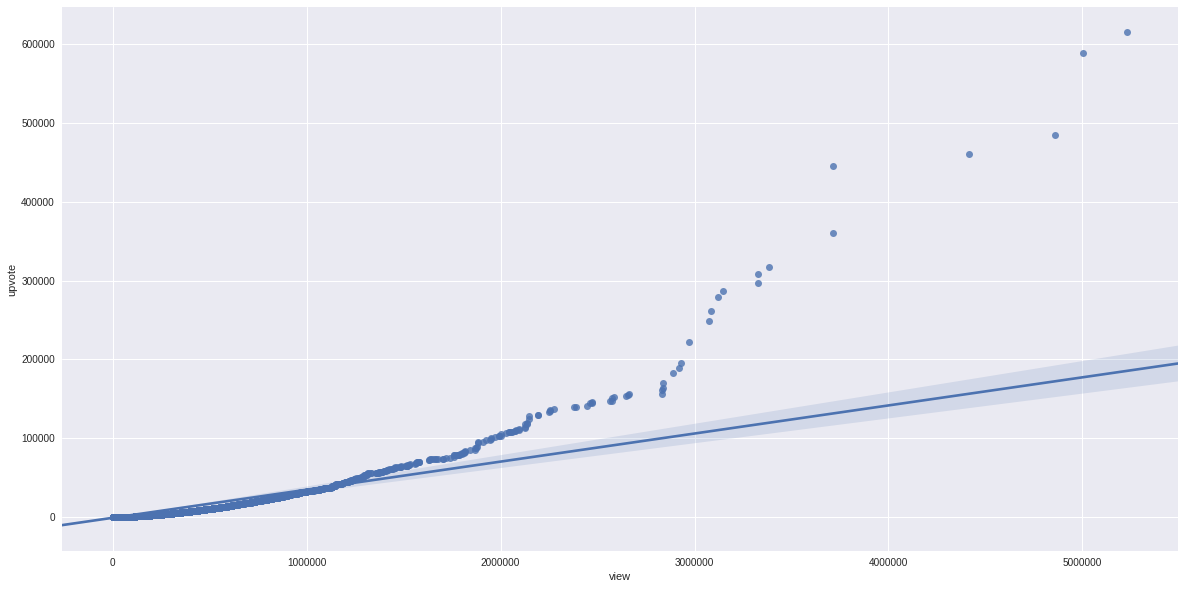

In [191]:
plt.figure(figsize=(20,10))
sns.regplot(x="view", y="upvote", data=train)
plt.show()

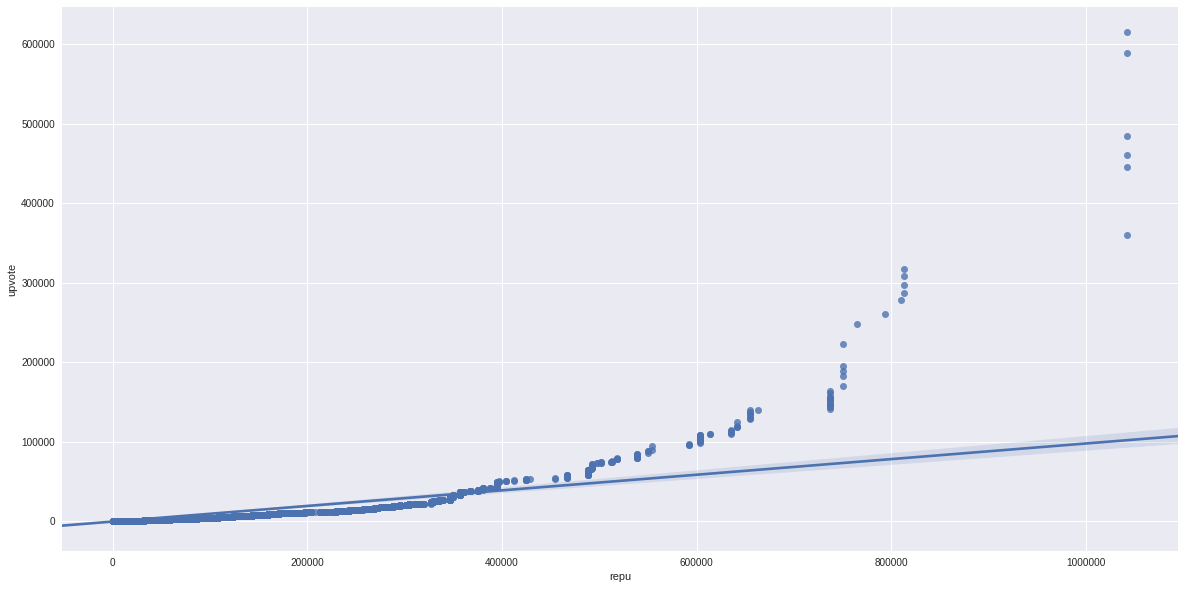

In [184]:
plt.figure(figsize=(20,10))
sns.regplot(x="repu", y="upvote", data=train)
plt.show()

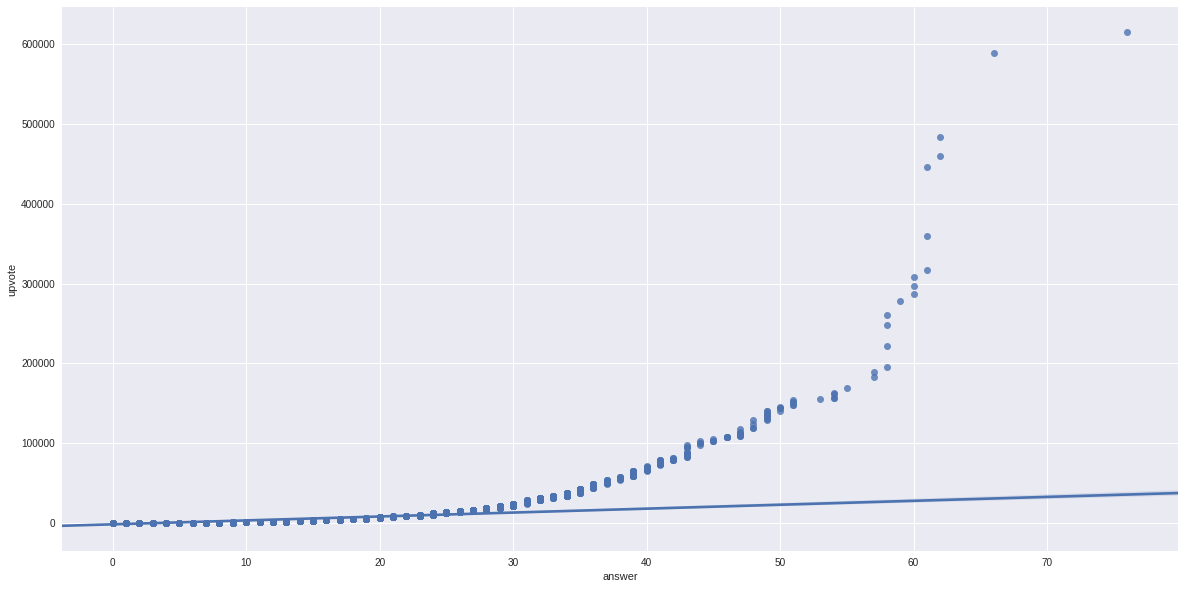

In [188]:
plt.figure(figsize=(20,10))
sns.regplot(x="answer", y="upvote", data=train)
plt.show()

In [61]:
test = pd.read_csv('drive/Machine_learning/AV/Enigma_ML/test_file.csv')
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [13]:
np.median(train['Reputation'])

1236.0

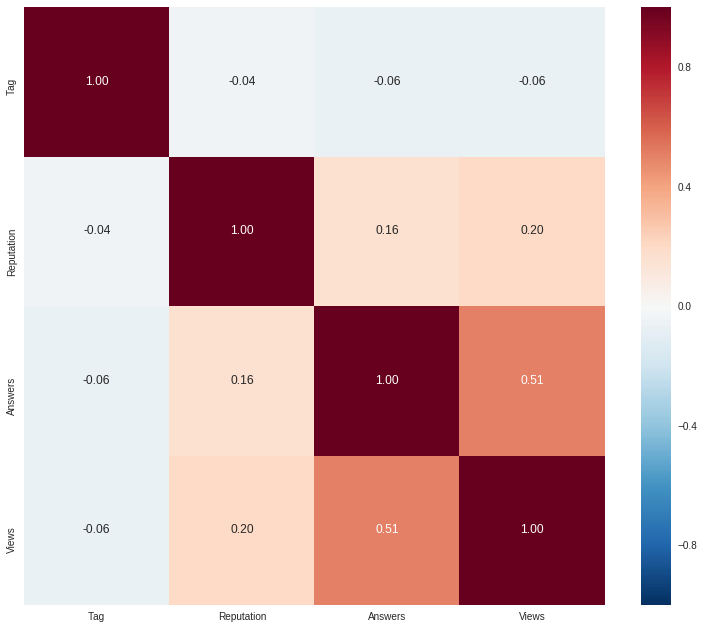

In [147]:
corr = x_train.corr()
f, ax = plt.subplots(figsize=(13, 11))
sns.heatmap(corr, annot=True, fmt=".2f")

In [9]:
x_train['Views'].dtype

NameError: ignored

In [0]:
train_data = train.drop(['ID'], axis = 1)
train_data = train_data.drop(['Username'], axis = 1)

In [0]:
y_train = train['Upvotes']
x_train = train_data.drop(['Upvotes'], axis =1)
#x_train = train_data

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(x_train['Tag'])
x_train['Tag'] = le.transform(x_train['Tag'])

#x_train['Reputation'] = le.fit_transform(x_train['Reputation'])

In [65]:
x_train.head()

,Tag,Reputation,Answers,Views
0,0,3942.0,2.0,7855.0
1,0,26046.0,12.0,55801.0
2,1,1358.0,4.0,8067.0
3,0,264.0,3.0,27064.0
4,1,4271.0,4.0,13986.0


In [0]:
bin1 = np.arange(0, 20000, 200)
bin2 = np.arange(20000, 1100000, 2000)
#bin3 = [500000, 1000000, 50000]
bin_repu = np.concatenate((bin1, bin2) )

In [67]:
label_repu = np.arange(0,639, 1 )
len(label_repu)
bin_repu


array([      0,     200,     400,     600,     800,    1000,    1200,
          1400,    1600,    1800,    2000,    2200,    2400,    2600,
          2800,    3000,    3200,    3400,    3600,    3800,    4000,
          4200,    4400,    4600,    4800,    5000,    5200,    5400,
          5600,    5800,    6000,    6200,    6400,    6600,    6800,
          7000,    7200,    7400,    7600,    7800,    8000,    8200,
          8400,    8600,    8800,    9000,    9200,    9400,    9600,
          9800,   10000,   10200,   10400,   10600,   10800,   11000,
         11200,   11400,   11600,   11800,   12000,   12200,   12400,
         12600,   12800,   13000,   13200,   13400,   13600,   13800,
         14000,   14200,   14400,   14600,   14800,   15000,   15200,
         15400,   15600,   15800,   16000,   16200,   16400,   16600,
         16800,   17000,   17200,   17400,   17600,   17800,   18000,
         18200,   18400,   18600,   18800,   19000,   19200,   19400,
         19600,   19

In [68]:
x_train['Reputation'], bin_final = pd.cut(train['Reputation'], bins = bin_repu, retbins = True, labels = False )
x_train['Reputation'].value_counts()

0.0      68753
1.0      24127
2.0      22735
3.0      17019
4.0      13318
5.0      10753
6.0       9160
7.0       8003
8.0       7025
9.0       6796
10.0      5946
11.0      5164
12.0      4573
13.0      4343
14.0      4064
16.0      3586
15.0      3555
17.0      3212
18.0      2881
19.0      2866
20.0      2661
100.0     2572
21.0      2552
23.0      2336
22.0      2288
26.0      2121
25.0      2104
24.0      1927
101.0     1902
27.0      1849
         ...  
288.0        3
223.0        3
228.0        3
202.0        3
248.0        3
205.0        3
284.0        3
241.0        3
217.0        2
396.0        2
317.0        2
367.0        2
190.0        2
338.0        2
296.0        2
209.0        1
304.0        1
235.0        1
243.0        1
421.0        1
246.0        1
494.0        1
194.0        1
486.0        1
472.0        1
234.0        1
212.0        1
256.0        1
286.0        1
255.0        1
Name: Reputation, Length: 287, dtype: int64

In [124]:
len(bin_final)

590

In [69]:
test['Reputation'] = pd.cut(test['Reputation'], bins = bin_final, labels = False)
test['Reputation'].value_counts()

0.0      29383
1.0      10329
2.0       9683
3.0       7345
4.0       5650
5.0       4583
6.0       4013
7.0       3323
8.0       2997
9.0       2737
10.0      2618
11.0      2294
12.0      1993
13.0      1899
14.0      1797
16.0      1530
15.0      1496
17.0      1334
18.0      1333
19.0      1284
20.0      1131
21.0      1094
23.0      1081
100.0     1028
22.0       963
26.0       925
24.0       875
101.0      854
25.0       822
102.0      781
         ...  
212.0        2
410.0        2
200.0        2
176.0        2
199.0        2
346.0        2
243.0        2
284.0        2
277.0        2
217.0        2
187.0        2
385.0        1
292.0        1
174.0        1
611.0        1
357.0        1
228.0        1
220.0        1
335.0        1
248.0        1
288.0        1
194.0        1
269.0        1
301.0        1
145.0        1
209.0        1
205.0        1
247.0        1
273.0        1
486.0        1
Name: Reputation, Length: 270, dtype: int64

In [157]:
x_train.describe()

,Tag,Reputation,Answers,Views
count,330045.00000,323413.000000,330045.000000,3.300450e+05
mean,3.54305,22.816424,3.917672,2.964507e+04
std,2.49392,37.189831,3.579515,8.095646e+04
min,0.00000,0.000000,0.000000,9.000000e+00
25%,1.00000,1.000000,2.000000,2.594000e+03
50%,4.00000,6.000000,3.000000,8.954000e+03
75%,6.00000,26.000000,5.000000,2.687000e+04
max,9.00000,611.000000,76.000000,5.231058e+06


In [95]:
#x_train['Reputation'].describe()

count    3.300450e+05
mean     7.773147e+03
std      2.706141e+04
min      0.000000e+00
25%      2.820000e+02
50%      1.236000e+03
75%      5.118000e+03
max      1.042428e+06
Name: Reputation, dtype: float64

In [0]:
val = []

for ans, i in enumerate (train['Reputation']):
  if (i >600000.0) : val.append(1)
  else : val.append(0)
x_train['Highrepu'] = val

#x_train['Reputation2'], bins2 = pd.qcut(np.log(1+x_train['Reputation']), 40, retbins=True, labels = False)

In [0]:
val = []

for ans, i in enumerate (test['Reputation']):
  if (i >600000.0) : val.append(1)
  else : val.append(0)
test['Highrepu'] = val

In [0]:
#x_train['Reputation'] = np.log(1+x_train['Reputation'])
x_train['Views'] = np.log(1+x_train['Views'])

In [0]:
#test['Reputation'] = np.log(1+test['Reputation'])
test['Views'] = np.log(1+test['Views'])

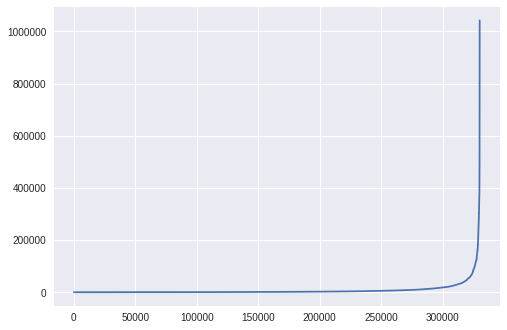

In [257]:
plt.plot(np.sort(x_train['Reputation']))

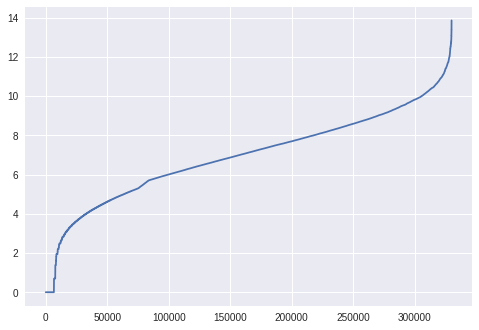

In [212]:
plt.plot(np.sort(np.log(1+x_train['Reputation'])))

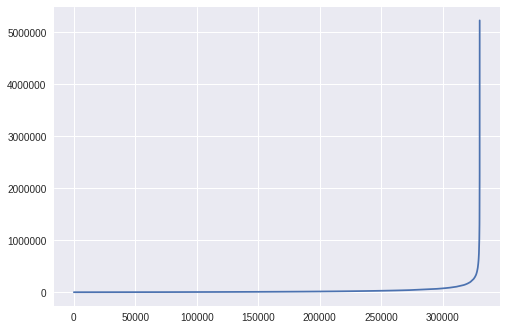

In [258]:
plt.plot(np.sort(x_train['Views']))

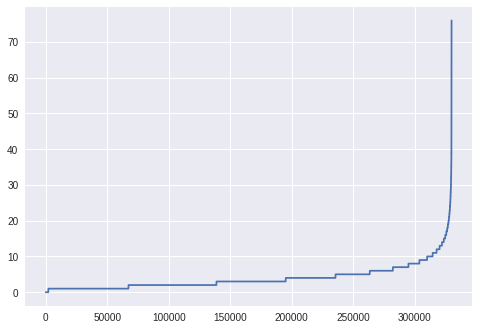

In [259]:
plt.plot(np.sort(x_train['Answers']))

In [0]:
from sklearn.cross_validation import train_test_split
x, x_val, y, y_val = train_test_split(x_train, y_train, test_size = 0.02)

In [75]:
x['Reputation'].dtype

dtype('float64')

In [76]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=1200,
                   max_depth=2,
                   learning_rate=0.05,
                   seed=7
                  )

xgb_model.fit(x, y, eval_set =[(x,y), (x_val, y_val)], eval_metric = 'rmse', verbose = 1 )


[0]	validation_0-rmse:3542.64	validation_1-rmse:2835.09
[1]	validation_0-rmse:3468.81	validation_1-rmse:2806.5
[2]	validation_0-rmse:3400.06	validation_1-rmse:2780.96
[3]	validation_0-rmse:3336.19	validation_1-rmse:2754.19
[4]	validation_0-rmse:3271.59	validation_1-rmse:2734.59
[5]	validation_0-rmse:3214.22	validation_1-rmse:2707.75
[6]	validation_0-rmse:3156.31	validation_1-rmse:2690.18
[7]	validation_0-rmse:3111.71	validation_1-rmse:2671.64
[8]	validation_0-rmse:3061.65	validation_1-rmse:2648.68
[9]	validation_0-rmse:3028.22	validation_1-rmse:2627.02
[10]	validation_0-rmse:2997.55	validation_1-rmse:2606.96
[11]	validation_0-rmse:2949.59	validation_1-rmse:2589.57
[12]	validation_0-rmse:2921.56	validation_1-rmse:2572.77
[13]	validation_0-rmse:2876.48	validation_1-rmse:2557.83
[14]	validation_0-rmse:2850.94	validation_1-rmse:2540.95
[15]	validation_0-rmse:2819.57	validation_1-rmse:2529.76
[16]	validation_0-rmse:2778.54	validation_1-rmse:2520.32
[17]	validation_0-rmse:2757.02	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7, silent=True,
       subsample=1)

In [77]:
pred1 = xgb_model.predict(x)
pred2 = xgb_model.predict(x_val)

print('Training error :',math.sqrt(mean_squared_error(y, pred1)))
print('Validation error :',math.sqrt(mean_squared_error(y_val, pred2)))

('Training error :', 768.0218431503373)
('Validation error :', 908.0691771283679)


In [86]:
sample = pd.read_csv('drive/Machine_learning/AV/Enigma_ML/sample.csv')
sample.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [0]:
ID = test['ID']

test['Tag'] = le.transform(test['Tag'])

In [79]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views,Highrepu
0,366953,0,28.0,3.0,50652,10.410335,0
1,71864,1,102.0,6.0,37685,7.912423,0
2,141692,3,4.0,1.0,135293,9.960246,0
3,316833,3,0.0,6.0,166998,9.827092,0
4,440445,3,22.0,10.0,53504,10.955026,0


In [80]:
test_data = test.drop(['ID'], axis = 1)
test_data = test_data.drop(['Username'], axis =1)
test_data.head()


,Tag,Reputation,Answers,Views,Highrepu
0,0,28.0,3.0,10.410335,0
1,1,102.0,6.0,7.912423,0
2,3,4.0,1.0,9.960246,0
3,3,0.0,6.0,9.827092,0
4,3,22.0,10.0,10.955026,0


In [0]:
predictions = xgb_model.predict(test_data)

In [82]:
predictions[:5]

array([284.58496 , 328.1615  ,  58.750153,  45.506832, 490.57288 ],
      dtype=float32)

In [83]:
submission = pd.DataFrame({
        "ID": ID,
        "Upvotes": predictions  
    })

submission.head(40)

,ID,Upvotes
0,366953,284.584961
1,71864,328.161499
2,141692,58.750153
3,316833,45.506832
4,440445,490.572876
5,3514,-93.789337
6,331420,7.102454
7,406540,93.712700
8,227379,-180.432281
9,331687,0.854998


In [0]:
submission.to_csv('drive/Machine_learning/AV/Enigma_ML/submission_last2.csv', index=False)